## Neural Network for Movie Genre Prediction from Audio, Visual, and Text Features

In [1]:
# General libraries
import pandas as pd
import numpy as np
import tensorflow as tf 
from tensorflow import keras

from platform import python_version
print('Python: ' + python_version())
print('Tensorflow: ' + tf.__version__)
print('Keras: ' + tf.keras.__version__)

Python: 3.7.5
Tensorflow: 2.0.0
Keras: 2.2.4-tf


# Data processing

In [2]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [20]:
# Reading files
train_features = pd.read_csv(open('data/train_features.tsv'), sep='\t')
train_labels = pd.read_csv(open('data/train_labels.tsv'), sep='\t')
valid_features = pd.read_csv(open('data/valid_features.tsv'), sep='\t')
valid_labels = pd.read_csv(open('data/valid_labels.tsv'), sep='\t')
test_features = pd.read_csv(open('data/test_features.tsv'), sep='\t')

# For convenience, it is considered a unique dataframe with different keys. It is useful to generate dummy columns.
features = pd.concat([train_features,valid_features,test_features], keys=['train', 'valid','test'])

In [21]:
# Dummies for tag field.
tag_dummies = features['tag'].str.get_dummies(',')
features = pd.concat([features, tag_dummies], axis=1)

In [ ]:
# Dummies for title field. Finally not added. 

# Exploration
"""title_dummies = features['title'].str.get_dummies(' ')
title_dummies = title_dummies.loc[:, (title_dummies.sum() >= 10)]"""

# For convenience, just a selection is added.
"""title_words = ['Adventures','Bad', 'Battle','Blood','Christmas','Dark','Dead', 'Death', 'Devil','Die','Evil','Family'
               ,'Fear','Heart','Heaven', 'Hell','Kill','King', 'Kiss','Love','Road','School', 'Sea', 'Secret', 'Son',
               'Space', 'Star', 'Summer','War', 'Wild','Wind', 'Woman']
title_dummies = pd.DataFrame()
for word in title_words:
    title_dummies[word] = features['title'].str.contains(word, regex=True).astype(int)

features = pd.concat([features, title_dummies], axis=1)"""

In [22]:
# Some fields are discarded: id fields, processed fields, features without variability.
features = features.drop(columns=['YTId','movieId','tag','title','avf31','avf32','avf104'])
# Normalization
features = (features-features.min())/(features.max()-features.min())

In [ ]:
# Filter to delete all the visual features, it is not part of the base model.
"""filter_avf = [col for col in features if col.startswith('avf')]
features = features.drop(columns=filter_avf)"""

In [ ]:
# Filter to delete all the audio features, it is not part of the base model.
"""filter_avf = [col for col in features if col.startswith('ivec')]
features = features.drop(columns=filter_avf)"""

In [23]:
# It is utilized 'mutual information' to select attributes. 
selector = SelectKBest(mutual_info_classif, k = 270)
selector.fit_transform(features.loc['train'], train_labels['genres'])

# For analysis purpose, it is made a dataframe with the selected features and their values of 'mutual information'.
names = features.loc['train'].columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
best_features = pd.DataFrame(data = list(zip(names, scores)), columns=['name', 'score'])

# The DataFrame with the best features is sorted for better visualization.
best_features = best_features.sort_values(['score', 'name'], ascending = [False, True])
pd.set_option('display.max_rows', None)
#print(best_features)

In [14]:
features.loc['train'][best_features['name']].sample(10)

,year,avf7,avf26,avf33,avf14,sci-fi,avf53,avf78,avf36,avf5,...,noir_thriller,humorous,comic_book,avf24,campy,futuristic,teen,avf50,violent,zombies
4101,0.895238,0.669383,0.191106,0.275933,0.417771,0.0,0.198090,0.258845,0.776474,0.187980,...,0.0,0.0,0.0,0.127477,0.0,0.0,0.0,0.393112,0.0,0.0
3544,0.923810,0.533932,0.213367,0.365766,0.485736,0.0,0.219223,0.197166,0.823111,0.200740,...,0.0,0.0,0.0,0.229774,0.0,0.0,0.0,0.441196,1.0,0.0
2149,0.247619,0.693227,0.113589,0.310932,0.593531,0.0,0.302396,0.014312,0.561089,0.113049,...,0.0,0.0,0.0,0.441492,0.0,0.0,0.0,0.414597,0.0,0.0
4022,0.952381,0.687996,0.263894,0.436707,0.000000,0.0,0.276452,0.176025,0.767854,0.263090,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.455922,0.0,0.0
2239,0.666667,0.750569,0.123467,0.428880,0.583924,0.0,0.208525,0.089893,0.624248,0.129898,...,0.0,0.0,0.0,0.599084,0.0,0.0,0.0,0.434124,0.0,0.0
939,0.838095,0.560997,0.216731,0.332073,0.630010,0.0,0.211644,0.147125,0.844748,0.220160,...,0.0,0.0,0.0,0.389335,0.0,0.0,0.0,0.441523,0.0,0.0
1170,0.723810,0.712911,0.181276,0.340261,0.651153,0.0,0.192720,0.128813,0.760854,0.182820,...,0.0,0.0,0.0,0.394511,0.0,0.0,0.0,0.399879,0.0,0.0
4193,0.952381,0.576464,0.178669,0.366171,0.609991,0.0,0.249999,0.281009,0.740034,0.178021,...,0.0,0.0,0.0,0.135969,0.0,0.0,0.0,0.382012,0.0,0.0
1054,0.628571,0.408215,0.302054,0.391543,0.509713,1.0,0.405890,0.270130,0.890632,0.311073,...,0.0,0.0,0.0,0.594630,0.0,1.0,0.0,0.441324,0.0,0.0
53,0.809524,0.585361,0.208591,0.344264,0.617567,0.0,0.245649,0.215057,0.842073,0.215220,...,0.0,0.0,0.0,0.047762,0.0,0.0,0.0,0.443952,0.0,0.0


# Train

In [15]:
# Libraries for developing a Neural Network
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
# Also it is processed the train and validation labels in one DataFrame.
labels = pd.concat([train_labels,valid_labels], keys=['train', 'valid'])
labels['genres'], label = pd.factorize(labels['genres'])

In [25]:
# Custom callback to stop the training for an accuracy higher than 0.4035
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] > 0.4035:
            self.model.stop_training = True

In [26]:
# Model arguments
args = dict(x = np.asarray(features.loc['train'][best_features['name']]),
            y = np.asarray(labels.loc['train']['genres']),
            epochs=100,
            validation_split=0.2,
            verbose=2,
            callbacks=[MyCustomCallback()],
            shuffle=True)

# Layer definition
input_layer = Input(shape=(270,))
hidden_layer_1 = Dense(150, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_layer)
hidden_layer_1 = Dropout(0.3)(hidden_layer_1)
hidden_layer_2 = Dense(70, activation='sigmoid')(hidden_layer_1)
hidden_layer_2 = Dropout(0.3)(hidden_layer_2)
output_layer = Dense(18, activation='softmax')(hidden_layer_2)
model = Model(inputs=input_layer, outputs=output_layer)

# Model set up
model.compile(tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 270)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               40650     
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 70)                10570     
_________________________________________________________________
dropout_5 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 18)                1278      
Total params: 52,498
Trainable params: 52,498
Non-trainable params: 0
_______________________________________________________

In [27]:
# Execute training
model.fit(**args)

Train on 4192 samples, validate on 1048 samples
Epoch 1/100
4192/4192 - 2s - loss: 2.6534 - accuracy: 0.1503 - val_loss: 2.6485 - val_accuracy: 0.1135
Epoch 2/100
4192/4192 - 1s - loss: 2.5006 - accuracy: 0.2078 - val_loss: 2.5350 - val_accuracy: 0.1947
Epoch 3/100
4192/4192 - 1s - loss: 2.3927 - accuracy: 0.2481 - val_loss: 2.4609 - val_accuracy: 0.2595
Epoch 4/100
4192/4192 - 0s - loss: 2.2927 - accuracy: 0.2879 - val_loss: 2.3386 - val_accuracy: 0.3082
Epoch 5/100
4192/4192 - 1s - loss: 2.2181 - accuracy: 0.3084 - val_loss: 2.2849 - val_accuracy: 0.3254
Epoch 6/100
4192/4192 - 0s - loss: 2.1569 - accuracy: 0.3249 - val_loss: 2.2416 - val_accuracy: 0.3206
Epoch 7/100
4192/4192 - 0s - loss: 2.1104 - accuracy: 0.3447 - val_loss: 2.1693 - val_accuracy: 0.3559
Epoch 8/100
4192/4192 - 1s - loss: 2.0604 - accuracy: 0.3514 - val_loss: 2.1618 - val_accuracy: 0.3559
Epoch 9/100
4192/4192 - 0s - loss: 2.0191 - accuracy: 0.3638 - val_loss: 2.1093 - val_accuracy: 0.3693
Epoch 10/100
4192/4192 - 

# Evaluation

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.dummy import DummyRegressor

In [29]:
# Zero R-Baseline
predict_baseline = pd.DataFrame({'predicted':'Romance'},index=features.loc['valid'].index)

In [30]:
# Prediction and extraction of predicted labels to pred_label.
predict = model.predict(np.asarray(features.loc['valid'][best_features['name']]))
classes = predict.argmax(axis=-1)
pred_label = label[classes]

# It is created a new DataFrame adding to the validation set the column 'predicted'.
results = pd.concat([labels.loc['valid'],pd.DataFrame(pred_label,columns=['predicted'])], axis=1)
results['genres'] = label[results['genres']]

In [31]:
print('Accuracy: ' + "{:.4f}".format(accuracy_score(results['genres'], results['predicted'])))
print('Baseline: ' + "{:.2f}".format(accuracy_score(results['genres'], predict_baseline['predicted'])))
print(classification_report(results['genres'], results['predicted'],digits = 2))
print(confusion_matrix(results['genres'], results['predicted']))

Accuracy: 0.4080
Baseline: 0.17
              precision    recall  f1-score   support

      Action       0.00      0.00      0.00         6
   Adventure       0.00      0.00      0.00         2
   Animation       0.00      0.00      0.00         3
    Children       0.00      0.00      0.00         3
      Comedy       0.46      0.47      0.47        38
       Crime       0.50      0.40      0.44         5
 Documentary       0.60      0.33      0.43        18
       Drama       0.32      0.51      0.39        43
     Fantasy       0.80      0.44      0.57        18
   Film_Noir       0.50      0.25      0.33         4
      Horror       0.40      0.50      0.44         8
     Musical       0.17      0.10      0.12        10
     Mystery       1.00      0.11      0.20        18
     Romance       0.33      0.47      0.39        51
      Sci_Fi       0.52      0.69      0.59        16
    Thriller       0.40      0.50      0.44        28
         War       0.60      0.43      0.50      

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# For analysis, it is extracted a subsection of confusion matrix
labels = np.unique(results['genres'])
sub_cm =  confusion_matrix(results['genres'], results['predicted'], labels=labels)
pd.DataFrame(sub_cm, index=labels, columns=labels)[['Comedy','Drama','Romance','Thriller']].loc[['Comedy','Drama','Romance','Thriller']]

,Comedy,Drama,Romance,Thriller
Comedy,18,3,14,1
Drama,5,22,7,5
Romance,6,14,24,4
Thriller,1,7,1,14


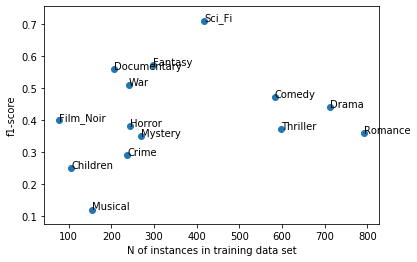

In [33]:
# Figure f1-score vs Feature count in training data set
import matplotlib.pyplot as plt

text_label = ['Children','Comedy','Crime','Documentary','Drama','Fantasy','Film_Noir','Horror','Musical','Mystery',
     'Romance','Sci_Fi','Thriller','War']
x = [106,583,237,207,713,298,78,244,154,270,791,417,598,241]
y = [0.25,0.47,0.29,0.56,0.44,0.57,0.4,0.38,0.12,0.35,0.36,0.71,0.37,0.51]


fig, scatter = plt.subplots()
scatter.scatter(x, y)
for i, text in enumerate(text_label):
    scatter.annotate(text, (x[i], y[i]))
    
plt.xlabel("N of instances in training data set")
plt.ylabel("f1-score")
plt.savefig('f1-score.png',dpi=300)

# Test

In [34]:
# For test data set, it is made the prediction and predicted labels are saved to pred_label.
predict = model.predict(np.asarray(features.loc['test'][best_features['name']]))
classes = predict.argmax(axis=-1)
pred_label = label[classes]

# It is created a new DataFrame with the 'movieID' field and the predicted labels.
results = pd.concat([test_features[['movieId']],pd.DataFrame(pred_label,columns=['genres'])], axis=1)
results.sample(10)

,movieId,genres
38,94289,Romance
218,116797,War
120,102991,Drama
27,93475,Thriller
77,97393,Drama
44,94790,Romance
233,127993,Fantasy
104,101016,Drama
225,120104,Romance
165,107357,Drama


In [35]:
# The results are saved for Kaggle Competitions.
results.to_csv('predictions.csv',encoding='utf-8',index=False)

End.